# Thermal Speed

In [1]:
%matplotlib inline

import numpy as np
from astropy import units as u
import matplotlib.pyplot as plt

from plasmapy.formulary import  Maxwellian_speed_1D, Maxwellian_speed_2D, Maxwellian_speed_3D
from plasmapy.formulary.parameters import thermal_speed

The thermal_speed function can be used to calculate the thermal velocity for a Maxwellian velocity distribution. There are three common definitions of the thermal velocity, which can be selected using the "method" keyword, which are defined for a 3D velocity distribution as


- 'most_probable' <br>
$v_{th} = \sqrt{\frac{2 k_B T}{m}}$

- 'rms' <br>
$v_{th} = \sqrt{\frac{3 k_B T}{m}}$

- 'mean_magnitude' <br>
$v_{th} = \sqrt{\frac{8 k_B T}{m\pi}}$

Similar speeds are defined for 1D and 2D distributions. The differences between these definitions can be illustrated by plotting them on their respective Maxwellian speed distributions.

<Figure size 432x288 with 0 Axes>

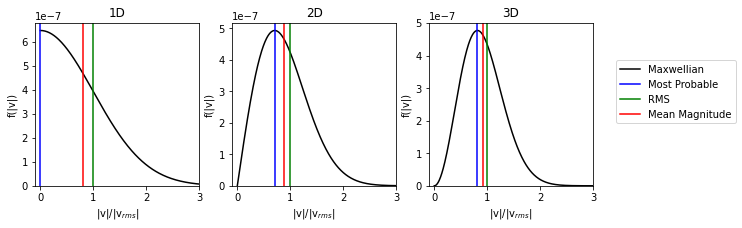

In [36]:
T = 1e5 * u.K

speeds = np.linspace(0, 8e6, num=600) * u.m/u.s

pdf_1D = Maxwellian_speed_1D(speeds, T=T, particle='e-')
pdf_2D = Maxwellian_speed_2D(speeds, T=T, particle='e-')
pdf_3D = Maxwellian_speed_3D(speeds, T=T, particle='e-')

dim = [1,2,3]
pdfs = [pdf_1D, pdf_2D, pdf_3D]

plt.tight_layout()
fig, ax = plt.subplots(ncols=3, figsize=(10,3))

for n, pdf in enumerate(pdfs):
    ndim = n+1
    v_most_prob = thermal_speed(T=T, particle='e-', method='most_probable', ndim=ndim)
    v_rms = thermal_speed(T=T, particle='e-', method='rms', ndim=ndim)
    v_mean_magnitude = thermal_speed(T=T, particle='e-', method='mean_magnitude', ndim=ndim)
    
    ax[n].plot(speeds/v_rms, pdf, color='black', label='Maxwellian')
    
    ax[n].axvline(x=v_most_prob/v_rms, color='blue', label='Most Probable')
    ax[n].axvline(x=v_rms/v_rms, color='green', label='RMS')
    ax[n].axvline(x=v_mean_magnitude/v_rms, color='red', label='Mean Magnitude')
    
    ax[n].set_xlim(-.1, 3)
    ax[n].set_ylim(0, None)
    ax[n].set_title('{:d}D'.format(ndim))
    ax[n].set_xlabel("|v|/|v$_{rms}|$")
    ax[n].set_ylabel("f(|v|)")


ax[2].legend(bbox_to_anchor=(1.9, .8), loc='upper right')



